In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#API keys
file_name = "../../PythonScripts/BootcampExercises/API_Keys/api_keys.json"
data = json.load(open(file_name))
consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#make user variables
BBClist = []
CBSlist = []
CNNlist = []
FOXlist = []
NYTlist = []
allresults = {"@BBC":BBClist,"@CBS":CBSlist,"@CNN":CNNlist,"@FoxNews":FOXlist,"@nytimes":NYTlist}
dataframes = {}

#loop through users
for i, (key, value) in enumerate(allresults.items()):
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    sentiments = []
    counter = 1
    
    #loop through tweets
    for x in range(5):
        public_tweets = api.user_timeline(key, page=x)
        
        #analyze tweets and append to lists
        for tweet in public_tweets:
            comp = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]                
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            allresults[key].append({"User": key,"Date": tweet["created_at"],"Compound": comp, "Positive": pos,
                           "Negative": neu , "Neutral": neg, "Tweets_Ago": counter, "Tweet": tweet["text"]})
            counter = counter + 1
            
    #convert lists to dataframes
    dataframes[key] = pd.DataFrame.from_dict(allresults[key])

#rename dataframes
BBC = dataframes["@BBC"]
CBS = dataframes["@CBS"]
CNN = dataframes["@CNN"]
FOX = dataframes["@FoxNews"]
NYT = dataframes["@nytimes"]
AllMedia = pd.concat([BBC, CBS, CNN, FOX, NYT])
AllMedia = AllMedia.groupby("User").mean()
AllMedia = AllMedia.reset_index()

#export dataframes to .csv
BBC.to_csv("BBC_TweetAnalysis.csv", encoding='utf-8', index=False)
CBS.to_csv("CBS_TweetAnalysis.csv", encoding='utf-8', index=False)
CNN.to_csv("CNN_TweetAnalysis.csv", encoding='utf-8', index=False)
FOX.to_csv("FOX_TweetAnalysis.csv", encoding='utf-8', index=False)
NYT.to_csv("NYT_TweetAnalysis.csv", encoding='utf-8', index=False)

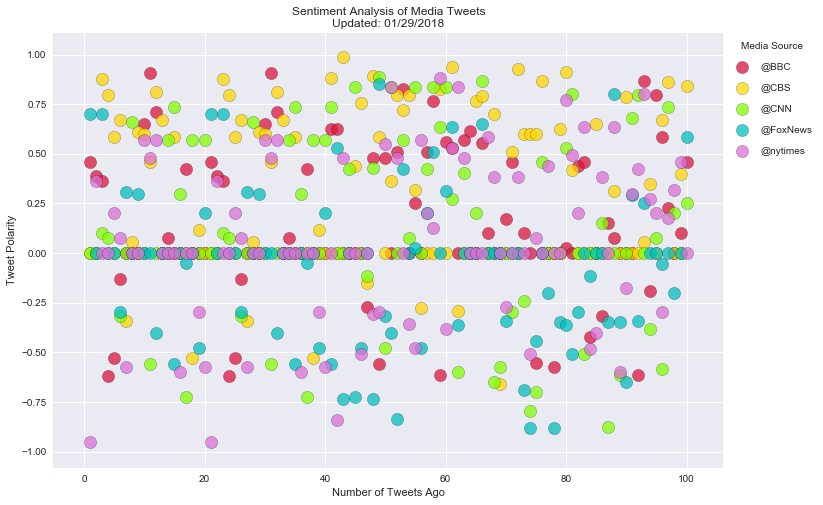

In [3]:
#create scatterplot
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.title("Sentiment Analysis of Media Tweets\nUpdated: " + time.strftime("%m/%d/%Y"))
plt.xlabel("Number of Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.scatter(BBC.Tweets_Ago, BBC.Compound, alpha=.75, c="crimson", label="@BBC", edgecolors="black", linewidth=.25, s=150)
plt.scatter(CBS.Tweets_Ago, CBS.Compound, alpha=.75, c="gold", label="@CBS", edgecolors="black", linewidth=.25, s=150)
plt.scatter(CNN.Tweets_Ago, CNN.Compound, alpha=.75, c="chartreuse", label="@CNN", edgecolors="black", linewidth=.25, s=150)
plt.scatter(FOX.Tweets_Ago, FOX.Compound, alpha=.75, c="c", label="@FoxNews", edgecolors="black", linewidth=.25, s=150)
plt.scatter(NYT.Tweets_Ago, NYT.Compound, alpha=.75, c="orchid", label="@nytimes", edgecolors="black", linewidth=.25, s=150)
plt.legend(labelspacing=1.2, title="Media Source", bbox_to_anchor=(1, 1))
plt.savefig('Scatterplot.png')
plt.show()

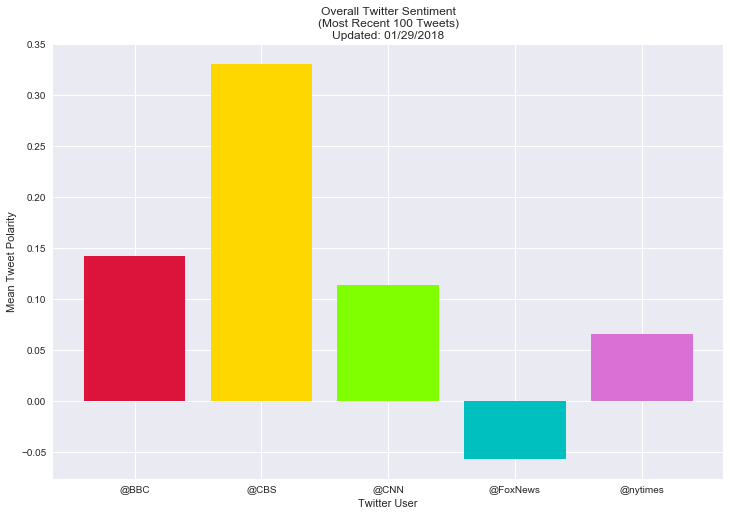

In [5]:
#create bar chart
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
Means = AllMedia["Compound"].tolist()
Users = AllMedia["User"].tolist()
Colors = ["crimson","gold","chartreuse","c","orchid"]
x_axis = np.arange(len(Means))
plt.bar(x_axis, Means, color=Colors, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Users)
plt.title("Overall Twitter Sentiment\n(Most Recent 100 Tweets)\nUpdated: " + time.strftime("%m/%d/%Y"))
plt.xlabel("Twitter User")
plt.ylabel("Mean Tweet Polarity")
plt.savefig('BarChart.png')
plt.show()